# Actividad 1

### 1- Se ha realizado una encuesta a 100 familias preguntando por el número de coches que poseen, los resultados han sido los siguientes:

Nº de vehículos Nº de familias

1 45

2 4

3 15

4 4

5 2

Introducir estos datos en un dataframe en R y añadir columnas con la frecuencia relativa, la frecuencia absoluta acumulada y la frecuencia relativa acumulada. Comentar brevemente los resultados.

In [1]:
nv=c(1,2,3,4,5) #numero de vehiculos
nf=c(45,34,15,4,2) #numero de familias
df <- data.frame(nv,nf) # df is a data frame
df 

nv,nf
1,45
2,34
3,15
4,4
5,2


FRECUENCIA RELATIVA

In [2]:
# Columnas con la frecuencia relativa
#FR= nf/suma(nf)

fr=nf/sum(df$nf) # suma de los datos de la columna numero de familias
fr #frecuencia
df["fr"]
#df<-data.frame(nv,nf,fr)
df



[1] 0.45 0.34 0.15 0.04 0.02

ERROR: Error in `[.data.frame`(df, "fr"): undefined columns selected


In [ ]:
Frecuencia Absoluta Acumulada

In [ ]:
#la frecuencia absoluta acumulada
#fracum= suma acumulada de nf/ suma de nf
df["csnf"]<-cumsum(df$nf)  # csnf: suma acumulada de numero de familias
df

In [ ]:
Frecuencia Relativa Acumulada

In [3]:
df["fracum"]<-cumsum(df$nf)/sum(df$nf) #fracum= frecuencia aboluta acumulada/suma de los datos de la columna numero de familias
df

nv,nf,fracum
1,45,0.45
2,34,0.79
3,15,0.94
4,4,0.98
5,2,1.00


En este ejercicio se observan varios comportamientos en los datos, por una parte, vemos que según la frecuencia relativa,
vemos que es casi la mitad de la suma de la frecuencia, 0.45. esto quiere decirm que casi la mitad de las familias tienen un solo coche.
vemos que las frecuencia relativa con la cual las familias tienen dos coches tambien es bastante alta, siendo la frecuencia relativa 0.34.

podríamos afirmar tambien, según la Frecuencia acumulada, que la mayoría de las familias tienen 1,2 o 3 coches a lo sumo, dandonos esto un 0.94 de frecuencia acumulada.

### 2- Utilizando el dataset iris, sobre la columna Sepal.Width realizar un análisis incluyendo el cálculo de medidas de tendencia central, de dispersión y de forma, apoyando los resultados sobre los gráficos necesarios y comentando las deducciones realizadas.

In [ ]:
library(stats)
library(dplyr)
library(ggplot2)

In [ ]:
summary(iris$Sepal.Width)

In [ ]:
iris$Sepal.Width

In [ ]:
dfSepal<- iris$Sepal.Width
dfSepal

Medidas de tendencia central

In [57]:
#Media
mean<-mean(dfSepal)
cat("Media:",mean)



Media: 3.057333

Mediana

In [ ]:
#Mediana
c<-median(dfSepal)
cat("Mediana:",c)

In [50]:
quantile(dfSepal)

0%  25%  50%  75% 100% 
 2.0  2.8  3.0  3.3  4.4

En cuanto a la moda, R y RStudio no tienen implementada ninguna función que la calcule. Por lo que vamos a definir una función que calcule la moda de un conjunto de datos. Así, tendremos que copiar y pegar el siguiente código en el Editor de RStudio y pulsamos Run

Mode <- function(x) {
ux <- unique(x)
ux[which.max(tabulate(match(x, ux)))]
}

Una vez hecho esto, podremos calcular la moda de un conjunto de datos tal y como sigue:

Mode (x)

In [52]:
moda <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
m<-moda(dfSepal)
cat("Moda:", m)

Moda: 3

Medidas de dispersión

. Varianza

In [53]:
var(dfSepal) 

[1] 0.1899794

Desviación típica

In [55]:
sd(dfSepal)

[1] 0.4358663

Según estos resultados podemos concluir que la mayoria de los valores se encuentran concetrados a su valor medio, es decir a 3.057

##Medidas de forma

In [72]:
#install.packages("e1071")
library(e1071)

skewness(dfSepal)

[1] 0.3126147

Como vemos el coeficiente de simetria es muy cercano a la media, lo cual nos indica que es una distribución simetrica y no presenta colas

Histograma

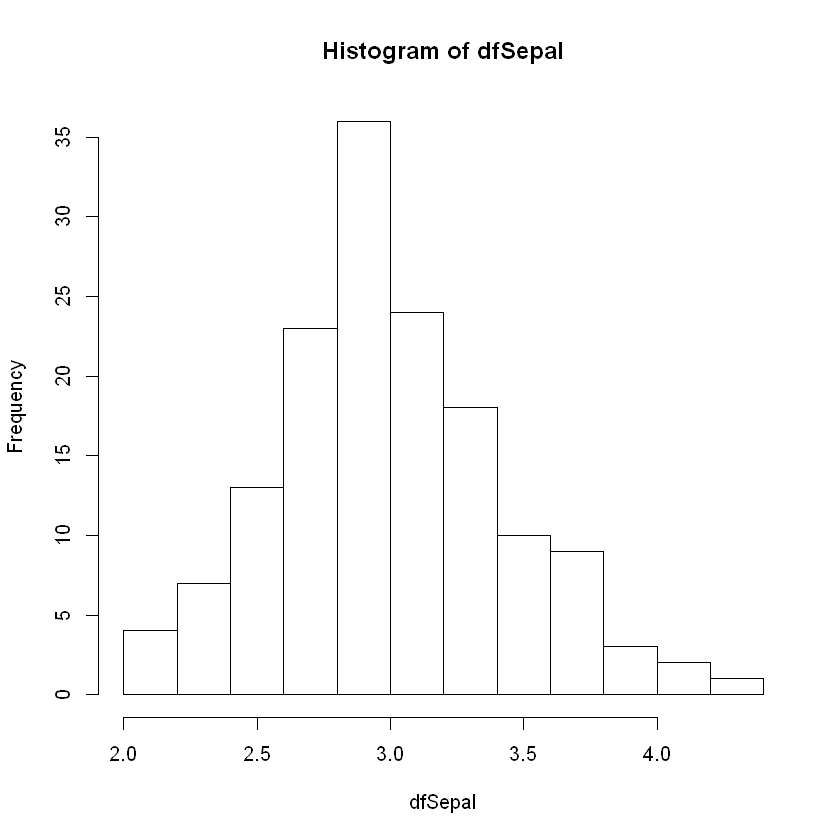

In [60]:
hist(dfSepal)

Kurtosis

In [73]:
kurtosis(dfSepal)

[1] 0.1387047

según la curtosis, obtenemos un valor positivo, lo cual nos indica que la mayoria de los valores se encuentran apuntando hacia la zona media.


#Para finalizar se presenta el siguiente histograma

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


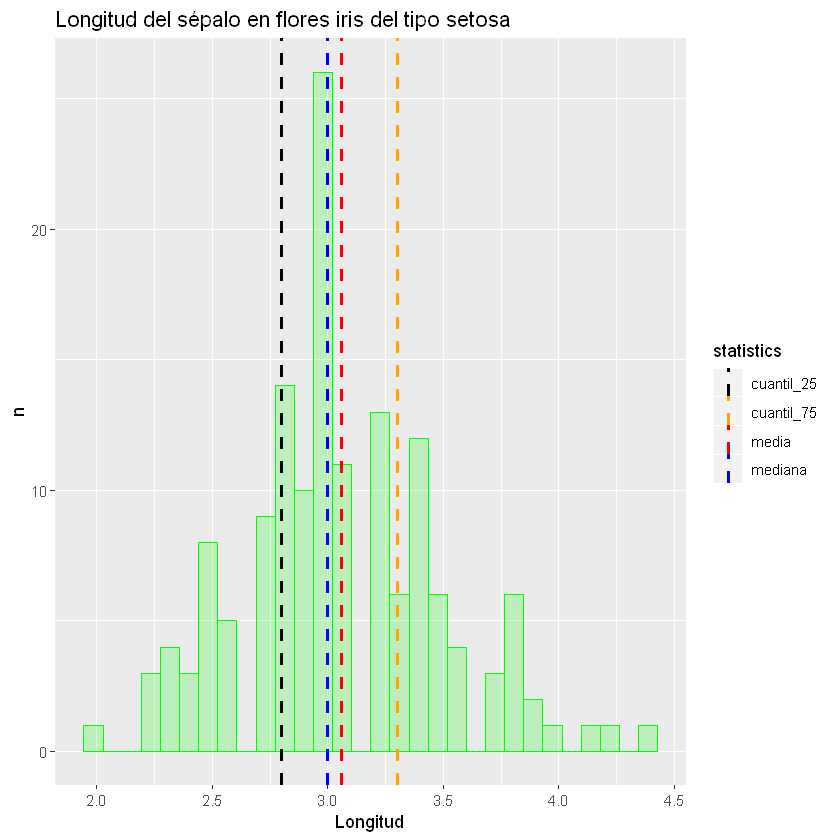

In [76]:


ggplot(aes(x = dfSepal), data = iris) + 
  geom_histogram(color = 'green', fill = 'green', alpha = 0.2) +
  labs(title="Longitud del sépalo en flores iris del tipo setosa") +
  geom_vline(aes(xintercept=median(dfSepal),
                 color="mediana"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = mean(dfSepal),
                 color="media"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = quantile(dfSepal, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
  geom_vline(aes(xintercept = quantile(dfSepal, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
  scale_color_manual(name = "statistics", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
  xlab("Longitud") + ylab("n")

In [ ]:
Se observa, que la mayoria de los valores se encuentran cercanos a la media y la mediana.